In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def checkTypes(phaseVec, omega):
    if not isinstance(phaseVec, np.ndarray):
        print("The phase vector must be a numpy array.")
        return False
    if not isinstance(omega, np.ndarray):
        print("The angular velocity vector must be a numpy array.")
        return False
    if not phaseVec.shape[0] == 2:
        print("The phase vector must be a 2xN matrix, where N is the number of particles")
        return False
    if not phaseVec.shape[1] == omega.shape[0]:
        print("The number of particles in the phase vector (2xN) and the angular velocity vector (N) don't match.")
        return False
    return True

def setOmega(phaseVec, omega_0 = 0.1, alpha = 0.05):
    J = np.square(phaseVec[0,]) + np.square(phaseVec[1,])
    newOmega  = omega_0 + alpha*J
    return newOmega
    
def plotTurns(phaseVec, omega, n, phaseSpaceFig, positionFig):
    for i in range(0, n):
        phaseSpaceFig.scatter(phaseVec[0,], phaseVec[1,])
        positionFig.plot(np.sum(phaseVec[0,])/phaseVec.shape[1], i)
        phaseVec = turn(phaseVec, omega)

def turn(phaseVec, omega, n=1, timestep=1):
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    theta = n*timestep*omega
    newPhaseVec[0,] = np.multiply(np.cos(theta), phaseVec[0,]) - np.multiply(np.sin(theta), phaseVec[1,])
    newPhaseVec[1,] = np.multiply(np.cos(theta), phaseVec[1,]) + np.multiply(np.sin(theta), phaseVec[0,])
    return newPhaseVec
    
def dipoleKick(phaseVec, omega, k):
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,] + k
    newPhaseVec[1,] = phaseVec[1,]
    newOmega = setOmega(newPhaseVec)
    return (newPhaseVec, newOmega)
    
def quadrapoleKick(phaseVec, omega, k): 
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k*phaseVec[0,]
    newOmega = setOmega(newPhaseVec)
    return (newPhaseVec, newOmega)

def sextapoleKick(phaseVec, omega, k): 
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k*np.square(phaseVec[0,])
    newOmega = setOmega(newPhaseVec)
    return (newPhaseVec, newOmega)

def octapoleKick(phaseVec, omega, k): 
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k*np.power(phaseVec[0,], 3)
    newOmega = setOmega(newPhaseVec)
    return (newPhaseVec, newOmega)

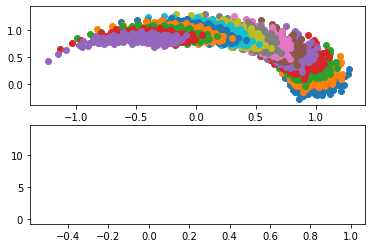

In [8]:
phaseVec = np.empty((2, 200))
phaseVec[0,] = np.random.normal(1.0, 0.1, size=(1,200))
phaseVec[1,] = np.random.normal(0.0, 0.1, size=(1,200))
omega = setOmega(phaseVec)
fig, (ax1, ax2) = plt.subplots(2)
plotTurns(phaseVec, omega, 15, ax1, ax2)